In [1]:
import random

from HAL.pixels import *
from HAL.data import export_json

In [ ]:
def draw_life(sketch: Picture, ix, iy, cell_x, cell_y, pic_size, extent_x, extent_y):
    center = (cell_x * ix + cell_x/2 , cell_y * iy + cell_y/2)
    radius = pic_size/max(extent_x, extent_y)/3
    sketch.draw_circle(center, radius, color=Color.BLUE)
    return sketch


def draw_red(sketch: Picture, center: tuple, radius: int):
    sketch.draw_circle(center, radius, color = Color.RED)
    return sketch

def draw_green(sketch: Picture, center: tuple, radius: int):
    sketch.draw_circle(center, radius, color = Color.GREEN)
    return sketch



In [3]:
def generate_metadata(extent_x, extent_y, func, red_func, green_func, generations, sizes):
    metadata = {}

    metadata['extent_x'] = extent_x
    metadata['extent_y'] = extent_y
    metadata['function'] = func
    metadata['red_function'] = red_func
    metadata['green_function'] = green_func

    metadata['generations'] = generations

    metadata['size_x'] = sizes[0]
    metadata['size_y'] = sizes[1]
    metadata['size_z'] = sizes[2]

    return metadata

In [8]:
def draw_sketch(pic_size, extent_x, extent_y, node):
    sketch = get_blank_picture(pic_size, pic_size, Color.BLACK)
    red_sketch = get_blank_picture(pic_size, pic_size, Color.BLACK)
    green_sketch = get_blank_picture(pic_size, pic_size, Color.BLACK)
    cell_x = pic_size / extent_x
    cell_y = pic_size / extent_y

    for ix in range(0, extent_x):
        for iy in range(0, extent_y):
            
            if iy == 0 or ix == 0:
                continue
            elif ix == extent_x-1 or iy == extent_y-1:
                continue


            if node == 'OFFICE':
                if ix % 3 != 0 and iy % 3 != 0:
                    sketch = draw_life(sketch, ix, iy, cell_x, cell_y, pic_size, extent_x, extent_y)

            if node == 'MUSEUM':
                rn = random.random()
                if rn > 0.5: draw_life(sketch, ix, iy, cell_x, cell_y, pic_size, extent_x, extent_y)
                red_sketch = draw_red(red_sketch, (200, 500), 200)
                green_sketch = draw_green(green_sketch, (700, 500), 200)

                sketch = screen_blend(sketch, red_sketch)
                sketch = screen_blend(sketch, green_sketch)

    return sketch

{'extent_x': 19, 'extent_y': 19, 'function': 'office', 'red_function': None, 'green_function': None, 'generations': 20, 'size_x': 10, 'size_y': 10, 'size_z': 5}


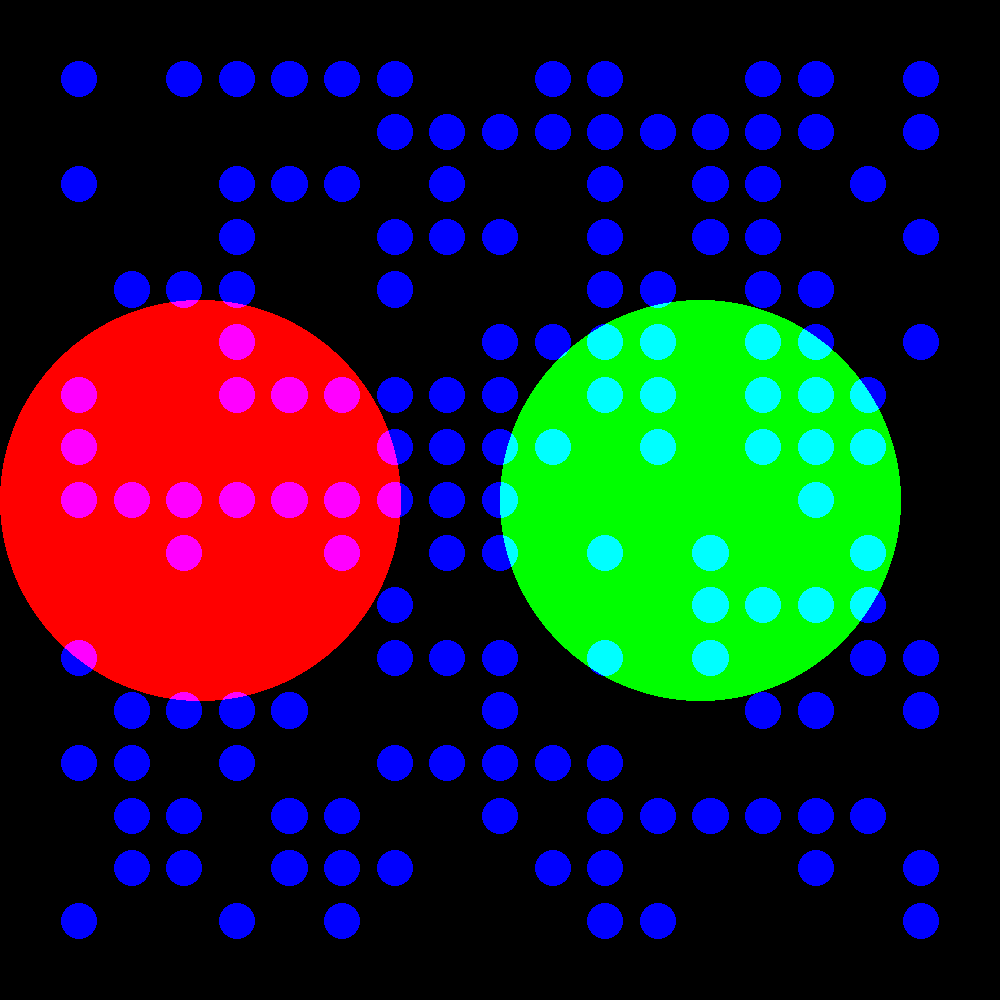

: 

In [ ]:
pic_size = 1000

extent_x = 19
extent_y = 19

node = 'MUSEUM'

func = 'office'
red_func = None
green_func = None

generations = 20

size_x = 10
size_y = 10
size_z = 5

sizes = (size_x, size_y, size_z)

sketch = draw_sketch(pic_size, extent_x, extent_y, node)

file_name = f'{node}_ex{extent_x}_ey{extent_y}_{size_x}-{size_y}-{size_z}_g{generations}'

sketch.save(f'sketches/{file_name}.bmp')
export_json(metadata, f'sketches/{file_name}.json')

print(metadata)
sketch